In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
google_df1 = pd.read_excel("google_rest_dict_20221118-160042.xlsx")
google_df2 = pd.read_excel("google_rest_dict_20221119-230955.xlsx")
google_df3 = pd.read_excel("google_rest_dict_20221122-170842.xlsx")
google_df4 = pd.read_excel("google_rest_dict_20221122-200554.xlsx")

In [3]:
google_df = pd.concat([google_df1,google_df2,google_df3,google_df4])

In [4]:
uber_df1 = pd.read_csv("restaurant-details-final.csv")
uber_df2 = pd.read_csv("restaurant-details-final[6].csv")
uber_df3 = pd.read_csv("restaurant-details-final[36].csv")
uber_df4 = pd.read_csv("restaurants-details-all.csv")

In [5]:
uber_df = pd.concat([uber_df1,uber_df2,uber_df3,uber_df4])[["name", "streetAddress", "avgRating"]]

In [6]:
# count the number of restaurants for each address

count_per_address = uber_df.groupby(['streetAddress']).size()

In [7]:
# get the list of addresses where there are more than one restaurants

address_with_multiple_res = list(count_per_address[count_per_address != 1].index)

In [8]:
# get the names of restaurants whose addresses have more than one restaurant

suspicious_df = uber_df.loc[uber_df['streetAddress'].isin(address_with_multiple_res)]
suspicious_res_name = suspicious_df['name']

In [9]:
# extract all the names of restaurants from Google

res_name_from_google = list(google_df['name'])

In [10]:
# if the name of a restaurant is not in Google data, the restaurant is considered to be fake

fake_res_name = []

for name in list(suspicious_res_name):
    if name not in res_name_from_google:
        fake_res_name.append(name)

In [11]:
# partition restaurants into fake set and real set

fake_res_df = uber_df.loc[uber_df["name"].isin(fake_res_name)]
real_res_df = uber_df.loc[~uber_df["name"].isin(fake_res_name)]

In [15]:
fake_res_df

,name,streetAddress,avgRating
1,The Butcher's Daughter - West Village,581 Hudson St,4.7
25,Pho 99,210 East 14th Street,4.2
33,Hollywood Diner - Union Square,574 6th Ave,4.7
51,Zutto Japanese American Pub,77 Hudson St,4.8
59,Kyuramen 九汤屋 (Union Square),210 East 14th Street,4.6
...,...,...,...
3207,Regina Pizzeria (South Shore Plaza),250 Granite St,4.9
3208,Wavy Baby Subs,850 Massachusetts Ave,NaN
3209,J.P. Licks (College),4 College Ave,4.8
3210,Hot Kurry,20 North Road,NaN


In [16]:
real_res_df

,name,streetAddress,avgRating
0,Joe &amp; The Juice (67 Spring Street),67 Spring Street,4.9
2,Dimes Deli,143 Division St,4.9
3,Spring Cafe NYC,153d Centre St,4.9
4,Essen Fast Slow Food -Soho,160 Varick Street,NaN
5,The Bean - Astor Place,31 3rd Avenue,5.0
...,...,...,...
3218,Pardon My Cheesesteak (1257 Highland Avenue),1257 Highland Avenue,4.6
3219,Hooters (Dedham),850 Providence Hwy Rt 1A,4.3
3220,Bonchon Chicken (299 Essex St),299 Essex St,4.7
3221,KFC (485 Boston Road),485 Boston Road,4.5


In [12]:
# get ratings for fake set and real set

fake_res_rating = list(fake_res_df["avgRating"])
real_res_rating = list(real_res_df["avgRating"])

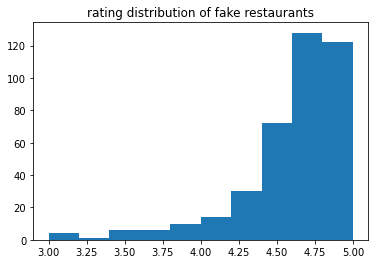

In [13]:
plt.hist(fake_res_rating)
plt.title("rating distribution of fake restaurants")
plt.show()

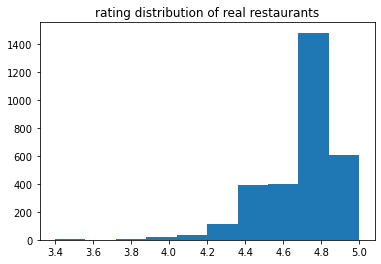

In [14]:
plt.hist(real_res_rating)
plt.title("rating distribution of real restaurants")
plt.show()